# COGS 118A- Project Checkpoint

# Names

- Merel van den Bos
- Alex Rivera
- Albert Aung
- Lillian Wood

# Abstract 
This project will focus on the online gaming storefront Steam and its review system. Our goal with the dataset is to create a model using sentiment analysis that can automatically detect whether a user's review of a game is positive or negative based on language alone. We will be using heavy feature selection, such as bag of words and weighing certain features. Then, we plan to run a classification model such as Naïve Bayes or a Decision Tree in an attempt to categorize incoming reviews into positive or negative. This will allow the review system to be more automatic and better show what the general consensus is about a particular game.

# Background

Steam is a highly-used online marketplace for P.C. videogames. According to Statista, in 2020, approximately 120 million people were active monthly on Steam, demonstrating its wide reach <a name="Statista"></a>[<sup>[4]</sup>](#Statista). The popularity of the platform has developed into a social feature by housing the P.C. gaming community and connecting friends through mutually-played games. An important feature of Steam, both as a marketplace and a social sphere, is the ability to write, read, and rate reviews for games.

The plethora of reviews on Steam provides both an interesting and abundant source of text with potential to drive useful sentiment analysis models. In their paper, "Steam Review Dataset - new, large scale sentiment dataset," Sobkowicz and Stokowiec introduce a dataset which they claim could be a powerful source of consumer data for sentiment analysis <a name="Sobkowicz"></a>[<sup>[3]</sup>](#sobkowicznote). Utilizing these reviews has relevant and important implications. Since these reviews act as consumer data, conclusions drawn from these reviews inform both gamers and game developers about successful and worthwhile games. Additionally, the function of reviewing is a very powerful feature, providing gamers with a voice that directly impacts which games sell and which games flop <a name="Sobkowicz"></a>[<sup>[3]</sup>](#sobkowicznote). It would be highly valuable for both development of future games and for satisfaction of gamers to tailor the review system to be effective and informative.

As it stands, reviews consist of both written commentary and a "Yes" (thumbs-up) or "No" (thumbs-down). The Yes and No ratings for each game are averaged to create two summative ratings which appear underneath the synopsis of the game when a user views the game's page. "Recent Reviews" averages the number of positive and negative recent reviews. "All" averages the number of all positive and negative reviews. The summative ratings are labeled on a scale of: overwhelmingly negative, very negative, negative, mostly negative, mixed, mostly positive, positive, very positive, overwhelmingly positive.

Although this feedback is already incredibly helpful to gamers and game developers, it is questionable whether the data is entirely accurate. As they stand, the summative ratings are binary, only based on "Yes" or "No." There is no way to account for partially liking or disliking a game. Forcing users to choose between Yes or No may skew the ratings incorrectly, since there is no middle ground. Therefore, it would be useful to also summarily analyze the written data in order to develop a more well-rounded summary of a game's reviews.

Previous research into sentiment analysis of Steam reviews shows that both Naïve Bayes and Decision Tree classification are useful models in predicting review sentiment <a name="zuo"></a>[<sup>[5]</sup>](#zuonote). It has been found that decision tree classification is a better-performing model than Naïve Bayes <a name="zuo"></a>[<sup>[5]</sup>](#zuonote). We aim to test this, by ultimately attempting both classification methods to predict positive and negative review sentiment. Based on our results, either confirming or contradicting prior research, we will select the best model to use for this sentiment analysis.

Additionally, a major aspect of this project will be feature selection of the textual Steam reviews in order to perform classification.  Feature selection is essential to developing more accurate classification models <a name="formannote"></a>[<sup>[1]</sup>](#forman), therefore we find it necessary to perform feature selection on our textual data. Multiple feature selection methods exist for sentiment analysis, such as ngrams, bag of words, information gain (IG) and sentiment lexicons <a name="Sharma"></a>[<sup>[2]</sup>](#sharmanote). However, this research targets other platforms, such as movie reviews which does not account for the language that is unique to gamers. Moreover, prior research accounts for removing special characters/digits, lower case, removing stop words, stemming, removing links, removing most frequent or most infrequent words, misspelled words, and short reviews <a name="Zuo"></a>[<sup>[5]</sup>](#zuonote). Yet, limitations include a lack of testing to see the effectiveness of different feature selections. Another concern is that these methods that are successful in other linguistic spheres but may not account for niche gamer-speak, sarcasm, emojis, and emoticons. This could all be very useful and valuable information, which we do not want to lose when trying to classify positive and negative reviews.  Further research is needed in regards to effective feature selection for sentiment analysis of Steam gaming reviews. Therefore, we propose our own solution. We will begin by using bag of words as our feature selection method. We plan to account for unique gamer speak by placing weights on certain characters, emojis, and emoticons. 

We propose the most meaningful way to analyze and summarize a game's written reviews would be to through heavy feature selection, weighing special characters and unique gamer speech, and utlizing decision tree or Naïve Bayes classification to predict the rating of a game based on the written reviews.

# Problem Statement

Problem: Optimizing the prediction of game ratings based on user reviews.

Solution: Sentiment Analysis through bag of words feature selection and weighing special characters and gamer speech, followed by Naïve Bayes or decision tree Classification.

Metrics of Measurement: Accuracy (percentage of correct game rating predictions) Precision (percentage of correct game rating predictions over correct game rating predictions and false correct game rating predictions) Recall (percentage of correct game rating predictions over correct game rating predicitions and false incorrect game rating predictions).

Replicability: Choosing a large dataset of 6.4 million observations made and making it available for everyone to access Looking to avoid overfitting Using easily-accessible libraries for creating different models which are shared online.

# Data

- Dataset: https://www.kaggle.com/datasets/andrewmvd/steam-reviews
- Description: The dataset contains over 6.4 million observations, which are publicly available reviews in English from the Steam Reviews portion of Steam store run by Valve. 5 variables describe each observation: Game id, Game Name, Review text, Review Sentiment: whether the game the review recommends the game or not, and Review vote: whether the review was recommended by another user or not.
- Some critical variables are the Review text, Review sentiment, and Review vote. Review text will be string data. Review sentiment is coded -1 as negative and 1 as positive review. Review vote is coded 0 as not recommended and 1 as recommended.
- Review sentiment and Review vote are already in numerical values, which alleviates cleaning. 

# Proposed Solution

The solution to the problem we're trying to solve is a classification, such as Naïve Bayes or Decision Trees, to perform sentiment analysis. Sentiment analysis classification is an ideal model because our problem involves evaluating user ratings on Steam. Sentiment analysis looks into analyzing text to classify it. In our case, classification is between binary options (i.e. whether a review is positive or negative). Moreover, gaining this information allows us to make predictions on the ratings of each game. 

To do this, we will apply different models to see which model optimizes the correct prediction of game ratings. To perform sentiment analysis, we will pre-process data to reduce noise and account for dimensionality to improve the efficiency of the machine learning models. Some ways we look to do this include cleaning the data by switching all the words into lowercase, removing numbers, removing stopwords and removing punctuation <a name="zuo"></a>[<sup>[5]</sup>](#zuonote). As previously mentioned, it is of necessity to perform at least one feature selection method. Because prior work in this area is lacking, we propose our own solution. We will begin by using bag of words as our feature selection method. Unique gamer speak will be accounted for by placing weights on certain characters, emojis, and emoticons. 

After performing feature selection, we aim to use a classification method  for sentiment analysis such as Naïve Bayes or Decision Trees. There is evidence to support the use of both models, although Decision Trees was shown to be more accurate <a name="zuo"></a>[<sup>[5]</sup>](#zuonote). However, we believe it will be useful to try both models in an attempt to identify the best-performing classification model, especially using our unique feature selection. Using one of these classification models will then allow us to automatically and more accurately categorize reviews into positive and negative without further user input.

Essentially, we propose the most meaningful way to analyze and summarize a game's written reviews would be to through bag of words feature selection, weighing special characters and unique gamer speech, and utilizing decision tree or Naïve Bayes classification to predict the rating of a game based on the written reviews.

# Evaluation Metrics

Since the problem we are tackling is a classifcation problem (i.e. whether a rating is positive or negative), our evaluation metrics in relation to sentiment analysis will include the following: precision, recall, f-score and accuracy. Accuracy or more specifically classification accuracy can be determined by the formula (Accuracy = Number of Correct Predictions / Total number of predictions made). This measures the correctness of predictions as suggested by the formula. An equation that envelopes both precision and recall is the calculation of the F1 score which entails (F1 = 2 * 1/(1/Precision + 1/Recall)). The F1 Score tells us how precise (preicison) and how error-less our model is (recall). A high amount of precision and low amount of recall can lead to a significant number of missing instances and a low amount of precision but high amount of recall shows us inaccurate the data is but it does not miss a significant number of instances. The F1 score which ranges from [0,1] calculates and tries to tell us the balance between precision and recall. The prediction formula is given by (Precision = Number of True Positives / ( Number of True Positives + Number of False Positives)) and tells us the number of correct positive results over the number of positive results predicted by the model. The recall formula is given by ( Number of True Positives / Number of True Positives + Number of False Negatives) and tells us the number of correct positive results over the number of all samples that should have identified as positive. 

Source: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

# Preliminary results

Our first step here was importing the dataset we are using. We will use the pandas library to accomplish this.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

df_steam = pd.read_csv(r'dataset.csv')
df_steam = df_steam.head(100000) # Limit amount of data while testing
df_steam.head()

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1


To get a better understanding of our data, we take a look at the count, mean and standard deviation of the data.

In [2]:
df_steam.describe()

,app_id,review_score,review_votes
count,100000.000000,100000.000000,100000.000000
mean,66839.370540,0.728680,0.146030
std,47757.058814,0.684858,0.353138
min,10.000000,-1.000000,0.000000
25%,10180.000000,1.000000,0.000000
50%,102700.000000,1.000000,0.000000
75%,105600.000000,1.000000,0.000000
max,105600.000000,1.000000,1.000000


## Perform Cleaning on Review Text

Next, we will need to clean the review text in order to process them through our model.

In [3]:
df_steam.isnull().sum()

app_id            0
app_name         97
review_text     190
review_score      0
review_votes      0
dtype: int64

We see that we have some entries where either the app_name is null, or the review_text is null. As we do not care about the app_name, it is okay if some entries do not have this listed. However, we will remove all of the reviews where the review text is empty, as this is what we are anaylzing. 

In [4]:
df_steam = df_steam.dropna(subset=['review_text'])
df_steam.isnull().sum()

app_id           0
app_name        97
review_text      0
review_score     0
review_votes     0
dtype: int64

Afterwards, we want to explore how many of the reviews are positive and how many are negative. 

<AxesSubplot:title={'center':'Review Count Distribution for Steam Dataset'}, xlabel='Types of Reviews (Positive/Negative)', ylabel='Number of Reviews'>

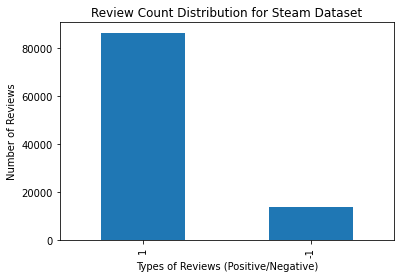

In [5]:
df_steam['review_score'].value_counts()
df_steam['review_score'].value_counts().plot(kind='bar', xlabel = 'Types of Reviews (Positive/Negative)', ylabel = 'Number of Reviews', title = 'Review Count Distribution for Steam Dataset')


We noticed a larger percentage of the data including positive reviews compared to negative reviews and is something we will be transparent about and will be addressed once the project is published. Next, we want to perform some preliminary cleaning on the review texts themselves to allow them to be processed by our model.

In [6]:
import string
import nltk
nltk.download('stopwords')

def clean_text(text):
    text_nonum = re.sub(r'\d+', '', text)
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    
    stopwords = nltk.corpus.stopwords.words('english')
    text_nostop = " ".join([word.lower() for word in text_no_doublespace.split() if word.lower() not in stopwords])
    return text_nostop
df_steam['review_text_clean'] = df_steam['review_text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arivera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df_steam.head()

,app_id,app_name,review_text,review_score,review_votes,review_text_clean
0,10,Counter-Strike,Ruined my life.,1,0,ruined life
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1,experience game type review saying things like...
2,10,Counter-Strike,This game saved my virginity.,1,0,game saved virginity
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0,• like original games • like games dont lag • ...
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1,easy learn hard master


Next, we will attempt feature extraction using a bag of words approach. We will then run this bag of words through a TF-IDF transformation, and finally create a model using naive Bayes. During the use of the Tfidf Vectorizer for Pipelining, we cleaned the data to exclude foreign languages by sticking to ascii values in order to clean up the data a bit more. 

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

X = df_steam['review_text_clean']
y = df_steam['review_score']

clf = Pipeline([
    ('vect', TfidfVectorizer(max_features=3000, strip_accents='ascii')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
    ])

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

classifier = clf.fit(X_train, y_train)

predictions_test = classifier.predict(X_test)
predictions_train = classifier.predict(X_train)

Below, we can see the confusion matrix from our initial run of the model using naive Bayes. 

Accuracy Rate: 0.89
Precision: 0.8962044105173876
Recall: 0.9862901814363223
F1-Score: 0.9390917928065546


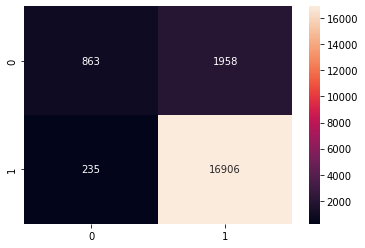

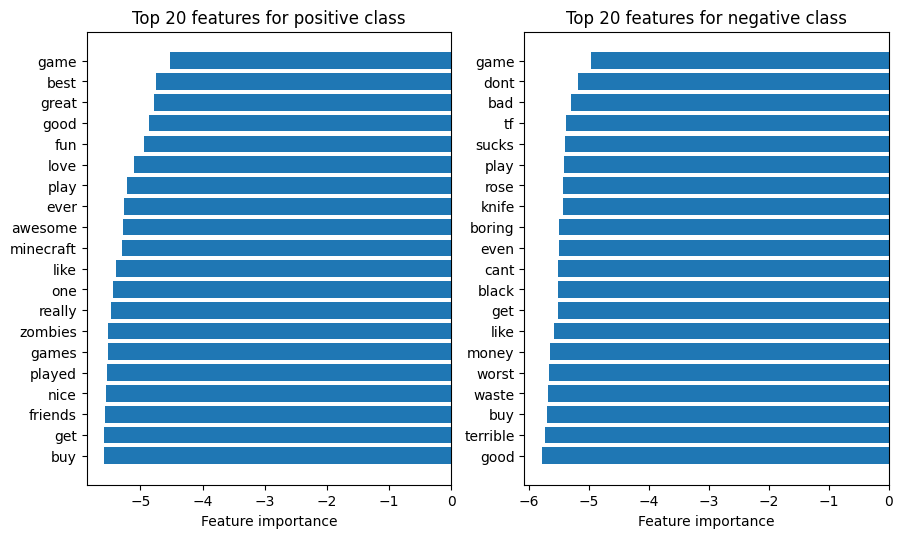

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance

cmat = confusion_matrix(y_test, predictions_test)

sns.heatmap(cmat, annot=True, fmt='')

print('Accuracy Rate: {}'.format(round(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat)), 3)))
print('Precision: {}'.format(precision_score(y_test, predictions_test)))
print('Recall: {}'.format(recall_score(y_test, predictions_test)))
print('F1-Score: {}'.format(f1_score(y_test, predictions_test)))

n = 20

features = classifier['vect'].get_feature_names_out()
importance_pos = classifier._final_estimator.feature_log_prob_[1].argsort()[::-1][:n]# summarize positive feature importance
importance_neg = classifier._final_estimator.feature_log_prob_[0].argsort()[::-1][:n]# summarize negative feature importance


plt.figure(figsize=(16, 6), dpi=100)
plt.subplot(131)
plt.title('Top %i features for positive class' %n)
plt.xlabel("Feature importance")
plt.barh(features[importance_pos], classifier._final_estimator.feature_log_prob_[1][importance_pos])
plt.gca().invert_yaxis()
plt.subplot(132)
plt.title('Top %i features for negative class' %n)
plt.xlabel("Feature importance")
plt.barh(features[importance_neg], classifier._final_estimator.feature_log_prob_[0][importance_neg])
plt.gca().invert_yaxis()
plt.show()

We evaluated the model using recall, precision and f1-scores. 

In [11]:
from sklearn.naive_bayes import BernoulliNB

X = df_steam['review_text_clean']
y = df_steam['review_score']

clf2 = Pipeline([
    ('vect', TfidfVectorizer(max_features=3000, strip_accents='ascii')),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB()),
    ])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

classifier2 = clf2.fit(X_train, y_train)

predictions_test = classifier2.predict(X_test)
predictions_train = classifier2.predict(X_train)

In [ ]:
cmat = confusion_matrix(y_test, predictions_test)

sns.heatmap(cmat, annot=True, fmt='')

print('Accuracy Rate: {}'.format(round(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat)), 3)))
print('Precision: {}'.format(precision_score(y_test, predictions_test)))
print('Recall: {}'.format(recall_score(y_test, predictions_test)))
print('F1-Score: {}'.format(f1_score(y_test, predictions_test)))

n = 20

features = classifier2['vect'].get_feature_names_out()
importance_pos = classifier2._final_estimator.feature_log_prob_[1].argsort()[::-1][:n]# summarize positive feature importance
importance_neg = classifier2._final_estimator.feature_log_prob_[0].argsort()[::-1][:n]# summarize negative feature importance


plt.figure(figsize=(16, 6), dpi=100)
plt.subplot(131)
plt.title('Top %i features for positive class' %n)
plt.xlabel("Feature importance")
plt.barh(features[importance_pos], classifier2._final_estimator.feature_log_prob_[1][importance_pos])
plt.gca().invert_yaxis()
plt.subplot(132)
plt.title('Top %i features for negative class' %n)
plt.xlabel("Feature importance")
plt.barh(features[importance_neg], classifier2._final_estimator.feature_log_prob_[0][importance_neg])
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df_steam['review_text_clean']
y = df_steam['review_score']

clf3 = Pipeline([
    ('vect', TfidfVectorizer(max_features=3000, strip_accents='ascii')),
    ('tfidf', TfidfTransformer()),
    ('clf', DecisionTreeClassifier()),
    ])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

classifier3 = clf3.fit(X_train, y_train)

predictions_test = classifier3.predict(X_test)
predictions_train = classifier3.predict(X_train)

In [ ]:
cmat = confusion_matrix(y_test, predictions_test)

sns.heatmap(cmat, annot=True, fmt='')

print('Accuracy Rate: {}'.format(round(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat)), 3)))
print('Precision: {}'.format(precision_score(y_test, predictions_test)))
print('Recall: {}'.format(recall_score(y_test, predictions_test)))
print('F1-Score: {}'.format(f1_score(y_test, predictions_test)))

n = 20

features = classifier3['vect'].get_feature_names_out()
importance = classifier3._final_estimator.feature_importances_.argsort()[::-1][:n]# summarize feature importance

plt.figure(figsize=(9, 6), dpi=100)
plt.subplot(131)
plt.title('Top %i features' %n)
plt.xlabel("Feature importance")
plt.barh(features[importance], classifier3._final_estimator.feature_importances_[importance])
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

X = df_steam['review_text_clean']
y = df_steam['review_score']

clf4 = Pipeline([
    ('vect', TfidfVectorizer(max_features=3000, strip_accents='ascii')),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
    ])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

classifier4 = clf4.fit(X_train, y_train)

predictions_test = classifier3.predict(X_test)
predictions_train = classifier3.predict(X_train)

In [ ]:
cmat = confusion_matrix(y_test, predictions_test)

sns.heatmap(cmat, annot=True, fmt='')

print('Accuracy Rate: {}'.format(round(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat)), 3)))
print('Precision: {}'.format(precision_score(y_test, predictions_test)))
print('Recall: {}'.format(recall_score(y_test, predictions_test)))
print('F1-Score: {}'.format(f1_score(y_test, predictions_test)))

n = 20

features = classifier4['vect'].get_feature_names_out()
importance = np.absolute(classifier4._final_estimator.coef_[0]).argsort()[::-1][:n]# summarize feature importance

plt.figure(figsize=(9, 6), dpi=100)
plt.subplot(131)
plt.title('Top %i features' %n)
plt.xlabel("Feature importance")
plt.barh(features[importance], classifier4._final_estimator.coef_[0][importance])
plt.gca().invert_yaxis()
plt.show()

# Ethics & Privacy

For our ethical review, we consulted the ‘’Data Science Ethics Checklist’’ by deon (https://deon.drivendata.org/), which contains a checklist of items for every data-related project. When people make a review on Steam, they get the option to choose whether it is public, only for their friends, or private. Our data is accessed from Kaggle which offers data to everyone who credits the party that has posted their dataset which we have done so. Nevertheless, we have also chosen a dataset with largely anonymous data for privacy reasons and avoid creating a potential bias by including personal information like gender for instance. 

Our data set does not include the users rather only user_ids which have been generated and have been kept confidential and the only identifying information is the Steam reviews themselves. Besides that, we also avoid the risk of unintended harm by choosing the anonymous data, where we avoid online abuse or physical harm being conducted upon the participants since their private information will be kept private in every way. Also, since some reviews are already private, this equalizes all the reviews together and Steam has provided this data. Their own website does have a privacy policy about for their users (https://store.steampowered.com/privacy_agreement/) so people must approve that. Despite the anonymity, we will also not use the data for any other purposes than our project. We have chosen a huge dataset which hopefully minimizes our potential bias. 

We are very aware of potential risks like p-hacking and wrongly sampling sizing and will pay attention to those. Any very odd outliers will be investigated and taken seriously. We know the source of our data and will share the dataset in our proposal for total transparency.

# Team Expectations 

We communicate through Discord where we either write each other and/or make calls, whatever is necessary for the discussion we need to have. We will also try to meet on campus in person in a while and work on the project together. 
We all respect each others way of working and we reach a consensus in good consultation. Also, we try to take everyones preferences considering topics for instance in consideration and so far this worked us very smoothly. When someone has a hard time makgin their deadline, we communicate this early upfront and help each other out.
The tasks that have to be done are assigned to everyone based on their own preferences and competencies. Some might be assigned to everyone and some might be assigned to one person, as long as there is clear communication about it and everybody agrees this works for us.

# Project Timeline Proposal

UPDATE THE PROPOSAL TIMELINE ACCORDING TO WHAT HAS ACTUALLY HAPPENED AND HOW IT HAS EFFECTED YOUR FUTURE PLANS

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/19  |  7 PM |  Brainstorm topics/questions | Discuss interesting topics; Determine best form of communication; Discuss approach to project | 
| 4/24  |  8 PM (talk over Discord) |  Edit the document with your piece of work | Help each other out with the final pieces; Discuss how to tackle our deadlines in the future; Submit first version of the project | 
| 5/7  | 10 AM  | Everyone had feedbacked another projct | Discuss how we are tackling our project; Assign group members to lead each specific part   |
| 5/18  | 6 PM  | Talk to TA about feedback (Lily) | Discuss the TA's feedback; Discuss further handling/progress on assigned pieces   |
| 5/20  | 10 PM  | Begin programming for project (Alex) | Discuss/edit project code; Submit Checkpoint |
| 5/25  | 12 PM  | Complete analysis | Discuss/edit full project; Write discussion and conclusion of the project |
| 6/8  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes


<a name="formannote"></a>1.[^](#forman): Forman, G. (2003). An extensive empirical study of feature selection metrics for text classification. The Journal of Machine Learning Research, 3, pp. 1289-1305.<br>
<a name="sharmanote"></a>2.[^](#sharma): Sharma & Dey. (2012). Performance Investigation of Feature Selection Methods and Sentiment Lexicons for Sentiment Analysis. Special Issue of International Journal of Computer Applications, June 2012.<br>
<a name="sobkowicznote"></a>3.[^](#sobkowicz): Sobkowicz, Antoni & Stokowiec, Wojciech. (2016). Steam Review Dataset - new, large scale sentiment dataset. https://www.researchgate.net/publication/311677831_Steam_Review_Dataset_-_new_large_scale_sentiment_dataset<br> 
<a name="statistanote"></a>4.[^](#statista): Statista.com. (2021). Number of peak concurrent Steam users from January 2013 to September 2021. https://www.statista.com/statistics/308330/number-stream-users/<br>
<a name="zuonote"></a>5.[^](#zuo): Zuo, Zhen. (2018). Sentiment Analysis of Steam Review Datasets using Naive Bayes and Decision Tree Classifier. IDEALS, 2018-07-03. http://hdl.handle.net/2142/100126<br>
